## Default of Credit Card Clients

In [91]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import StratifiedShuffleSplit

In [92]:
df_original = pd.read_excel("input/default of credit card clients.xls",header=1)

In [93]:
df_original =df_original.rename({'PAY_0' : 'PAY_1'},axis=1)

In [94]:
df = df_original.copy()

In [95]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

There is no missing data

In [96]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

## stratifiedshuffle on SEX and default

In [97]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index , test_index in split.split(df,df.iloc[:,[2,-1]]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]
    

In [98]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

![title](img/1129/NT_Dollar.png)

LIMIT_BAL = Balance limit

SEX = 1 = male ; 2= femate

Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

Marital status (1 = married; 2 = single; 3 = others).

Age 

X6 - X11: History of past payment X6 being most recent

-2 inactive account ; -1 paid duly ; 0 = paid minimal monthly payment ; n = delayed for n month 0<n<10


In [100]:
df = df_train

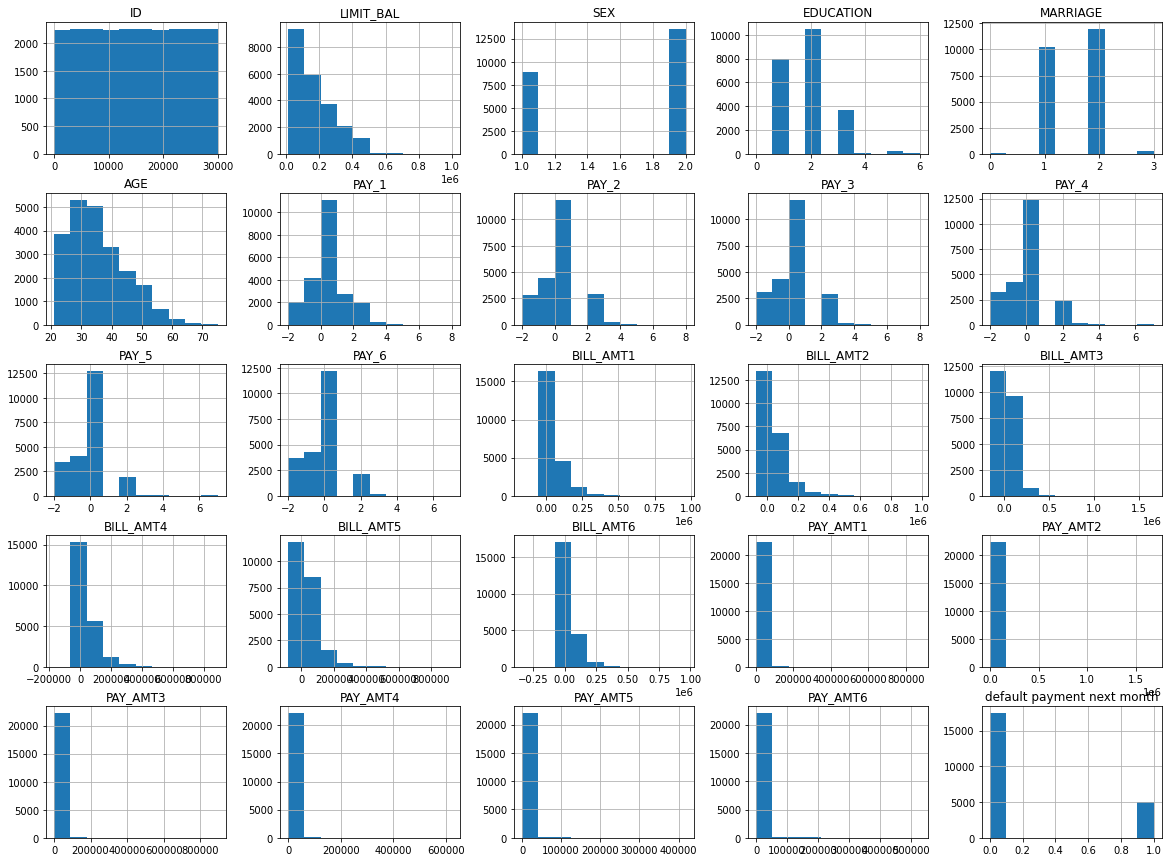

In [101]:
import matplotlib.pyplot as plt
df.hist(figsize= (20,15))
plt.show()

## New attribute "Month usage approximation" (5 of them used_app_1 - used_app_5

In [102]:
df_usage = pd.DataFrame()
BILL = []
PAY = []
for i in df.columns:
    BILL.append(i)
for i in df.columns:
    PAY.append(i)
for i in range(5):
    df_usage[f"used_app_{i+1}"] = df[BILL[i]]-(df[BILL[i+1]]-df[PAY[i+1]])

array([[<AxesSubplot:title={'center':'used_app_1'}>,
        <AxesSubplot:title={'center':'used_app_2'}>],
       [<AxesSubplot:title={'center':'used_app_3'}>,
        <AxesSubplot:title={'center':'used_app_4'}>],
       [<AxesSubplot:title={'center':'used_app_5'}>, <AxesSubplot:>]],
      dtype=object)

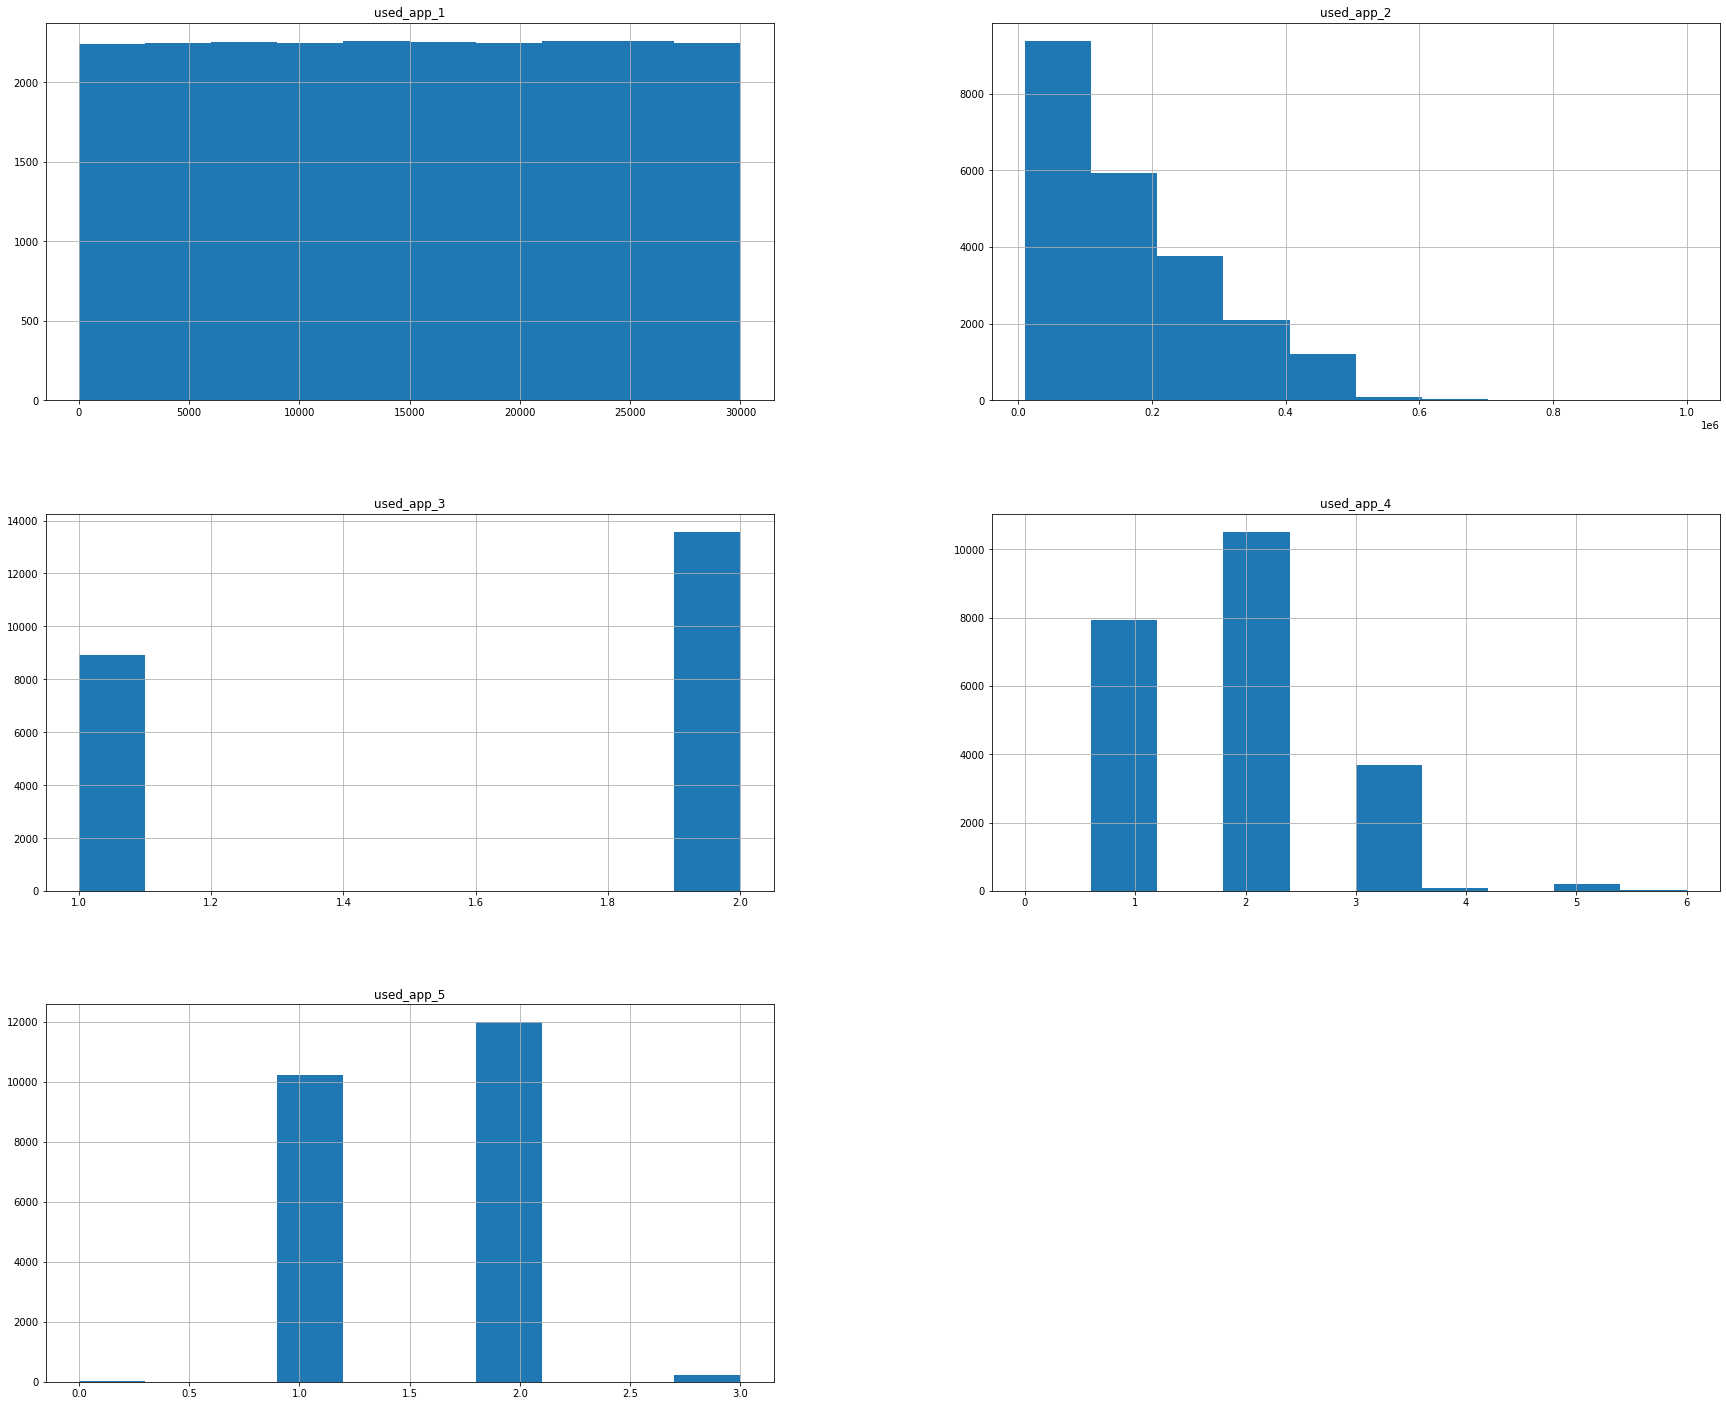

In [103]:
df_usage.hist(figsize=(30,25))

## Logarithmic Scaling attribute (for BILLING and PAY_amount) total 12

In [104]:
def log_pre (x):
    if abs(x)<5:
        return 0
    return np.log(abs(x))*x/abs(x)
def log_pre_col (column):
    return column.map(lambda x:log_pre(x))

In [105]:
x = (df<10).sum()-(df<1).sum()
print(x)

ID                                7
LIMIT_BAL                         0
SEX                           22500
EDUCATION                     22489
MARRIAGE                      22459
AGE                               0
PAY_1                          5075
PAY_2                          3299
PAY_3                          3176
PAY_4                          2623
PAY_5                          2212
PAY_6                          2320
BILL_AMT1                         5
BILL_AMT2                         5
BILL_AMT3                         5
BILL_AMT4                         2
BILL_AMT5                         3
BILL_AMT6                         4
PAY_AMT1                         84
PAY_AMT2                         96
PAY_AMT3                        103
PAY_AMT4                         93
PAY_AMT5                         76
PAY_AMT6                         55
default payment next month     4977
dtype: int64


In [106]:
df_log =df.iloc[:,12:-1].apply(log_pre_col,axis=0) #apply(function,axis=)

In [107]:
rename_dict = {}
for i in df_log.columns:
    rename_dict[i] = 'log_'+i

In [108]:
df_log =df_log.rename(rename_dict,axis=1)

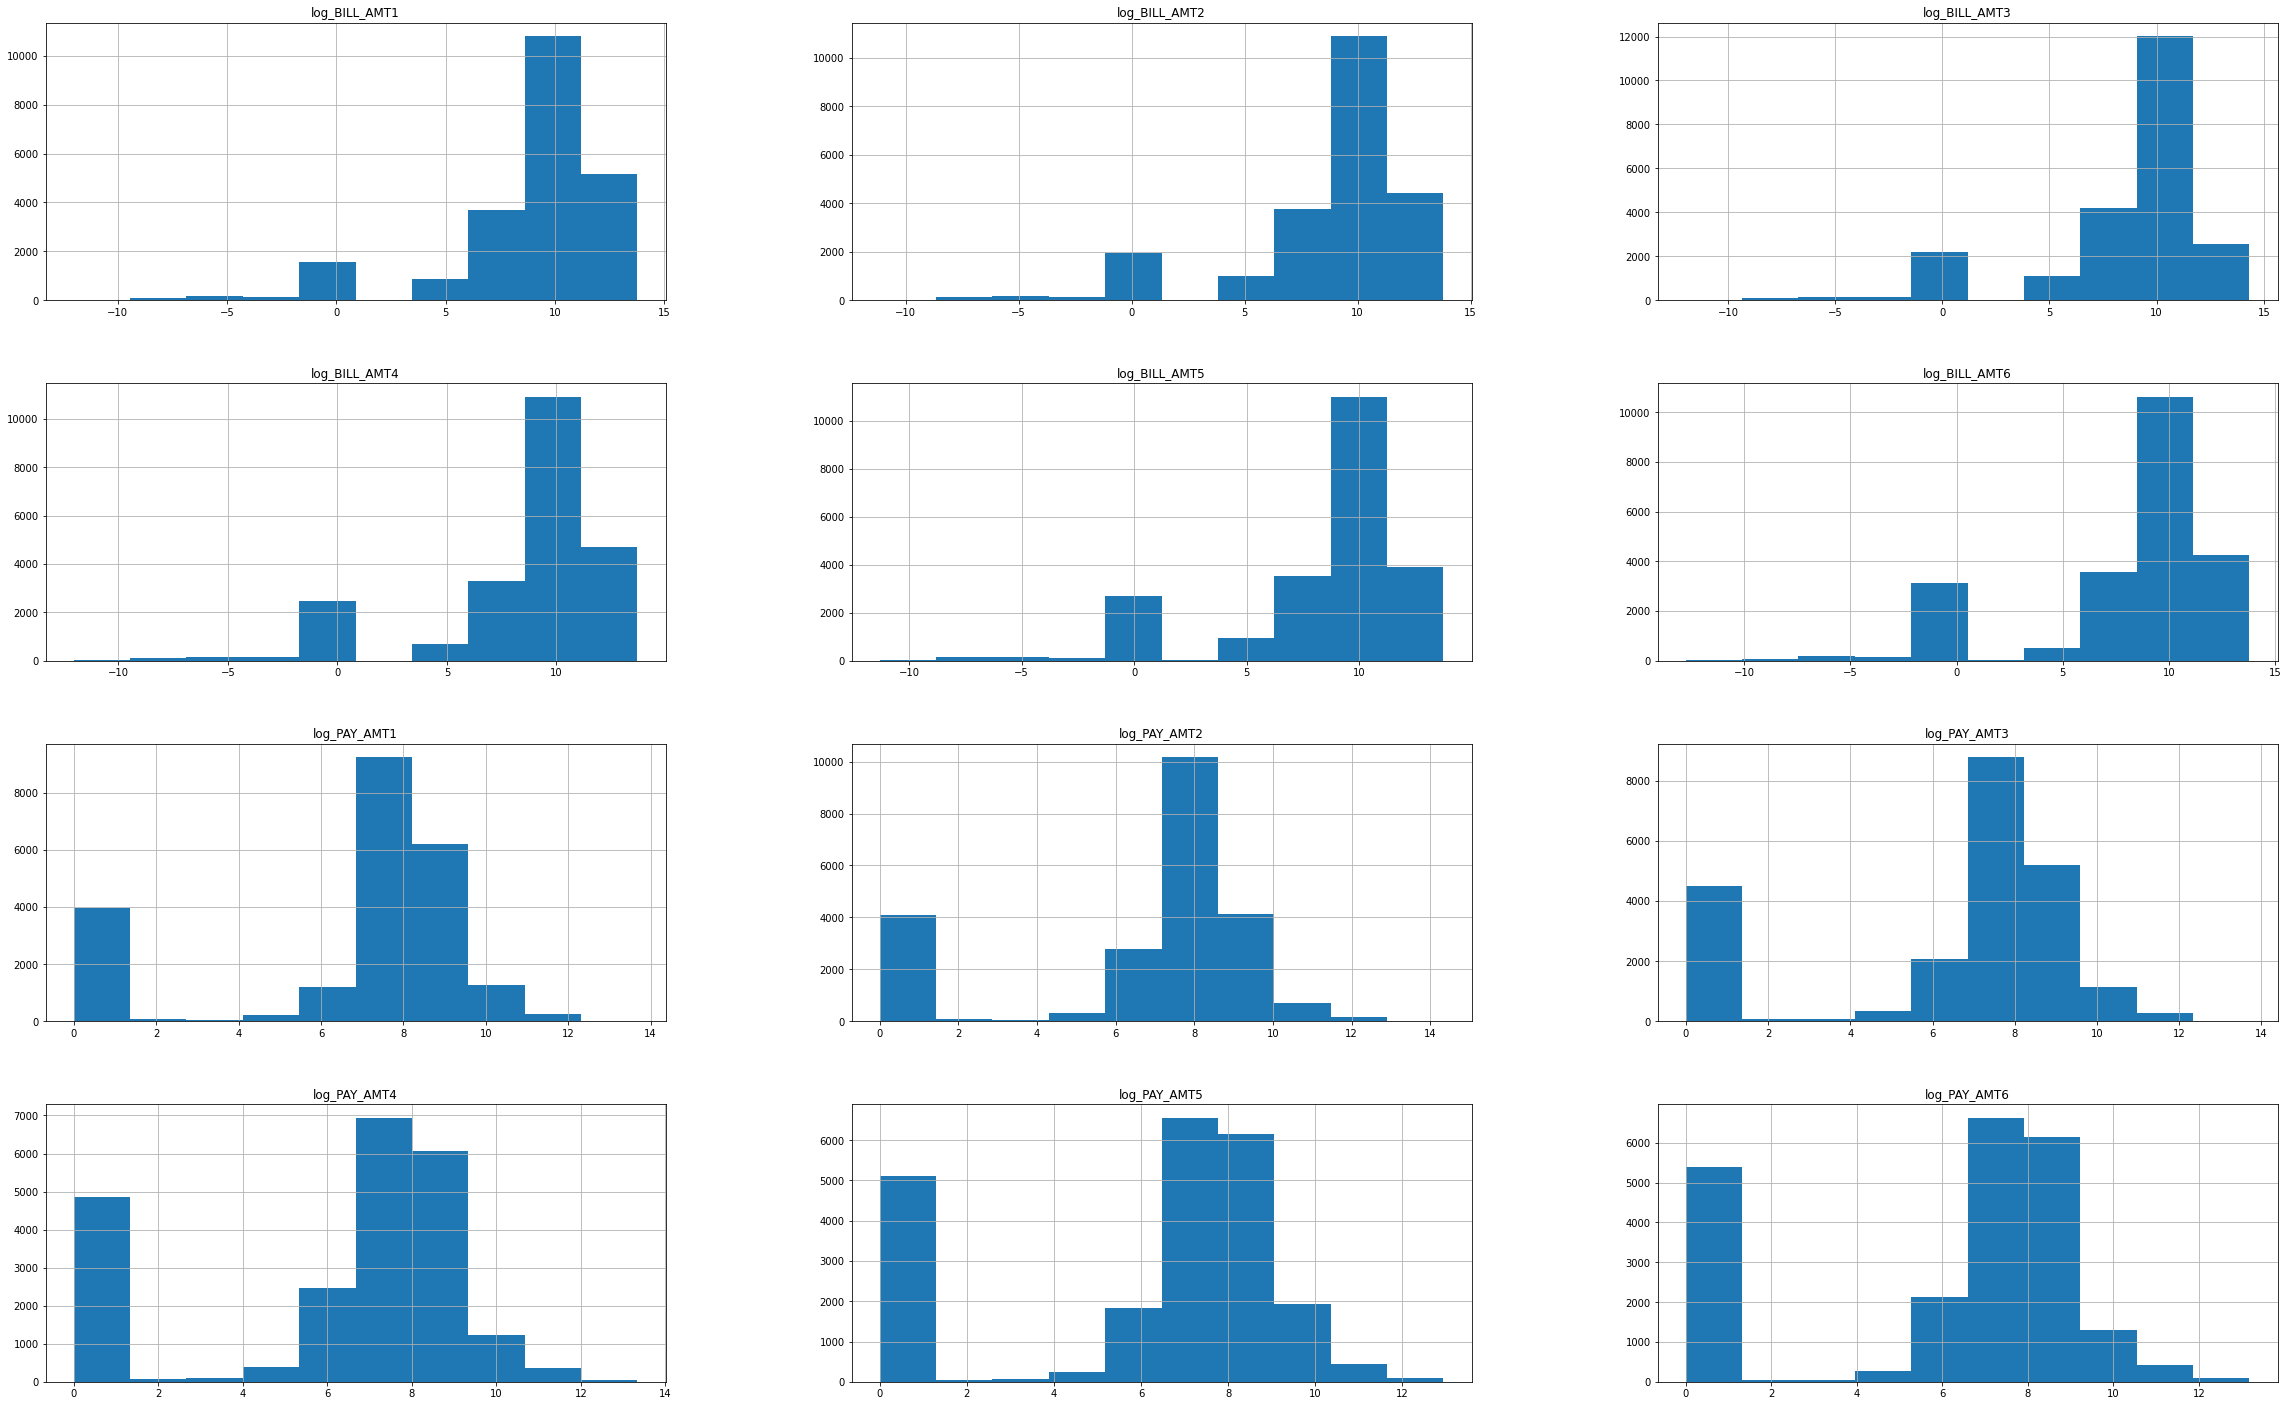

In [109]:
df_log.hist(figsize=(40,25))
plt.show()

## comparison with non log scale

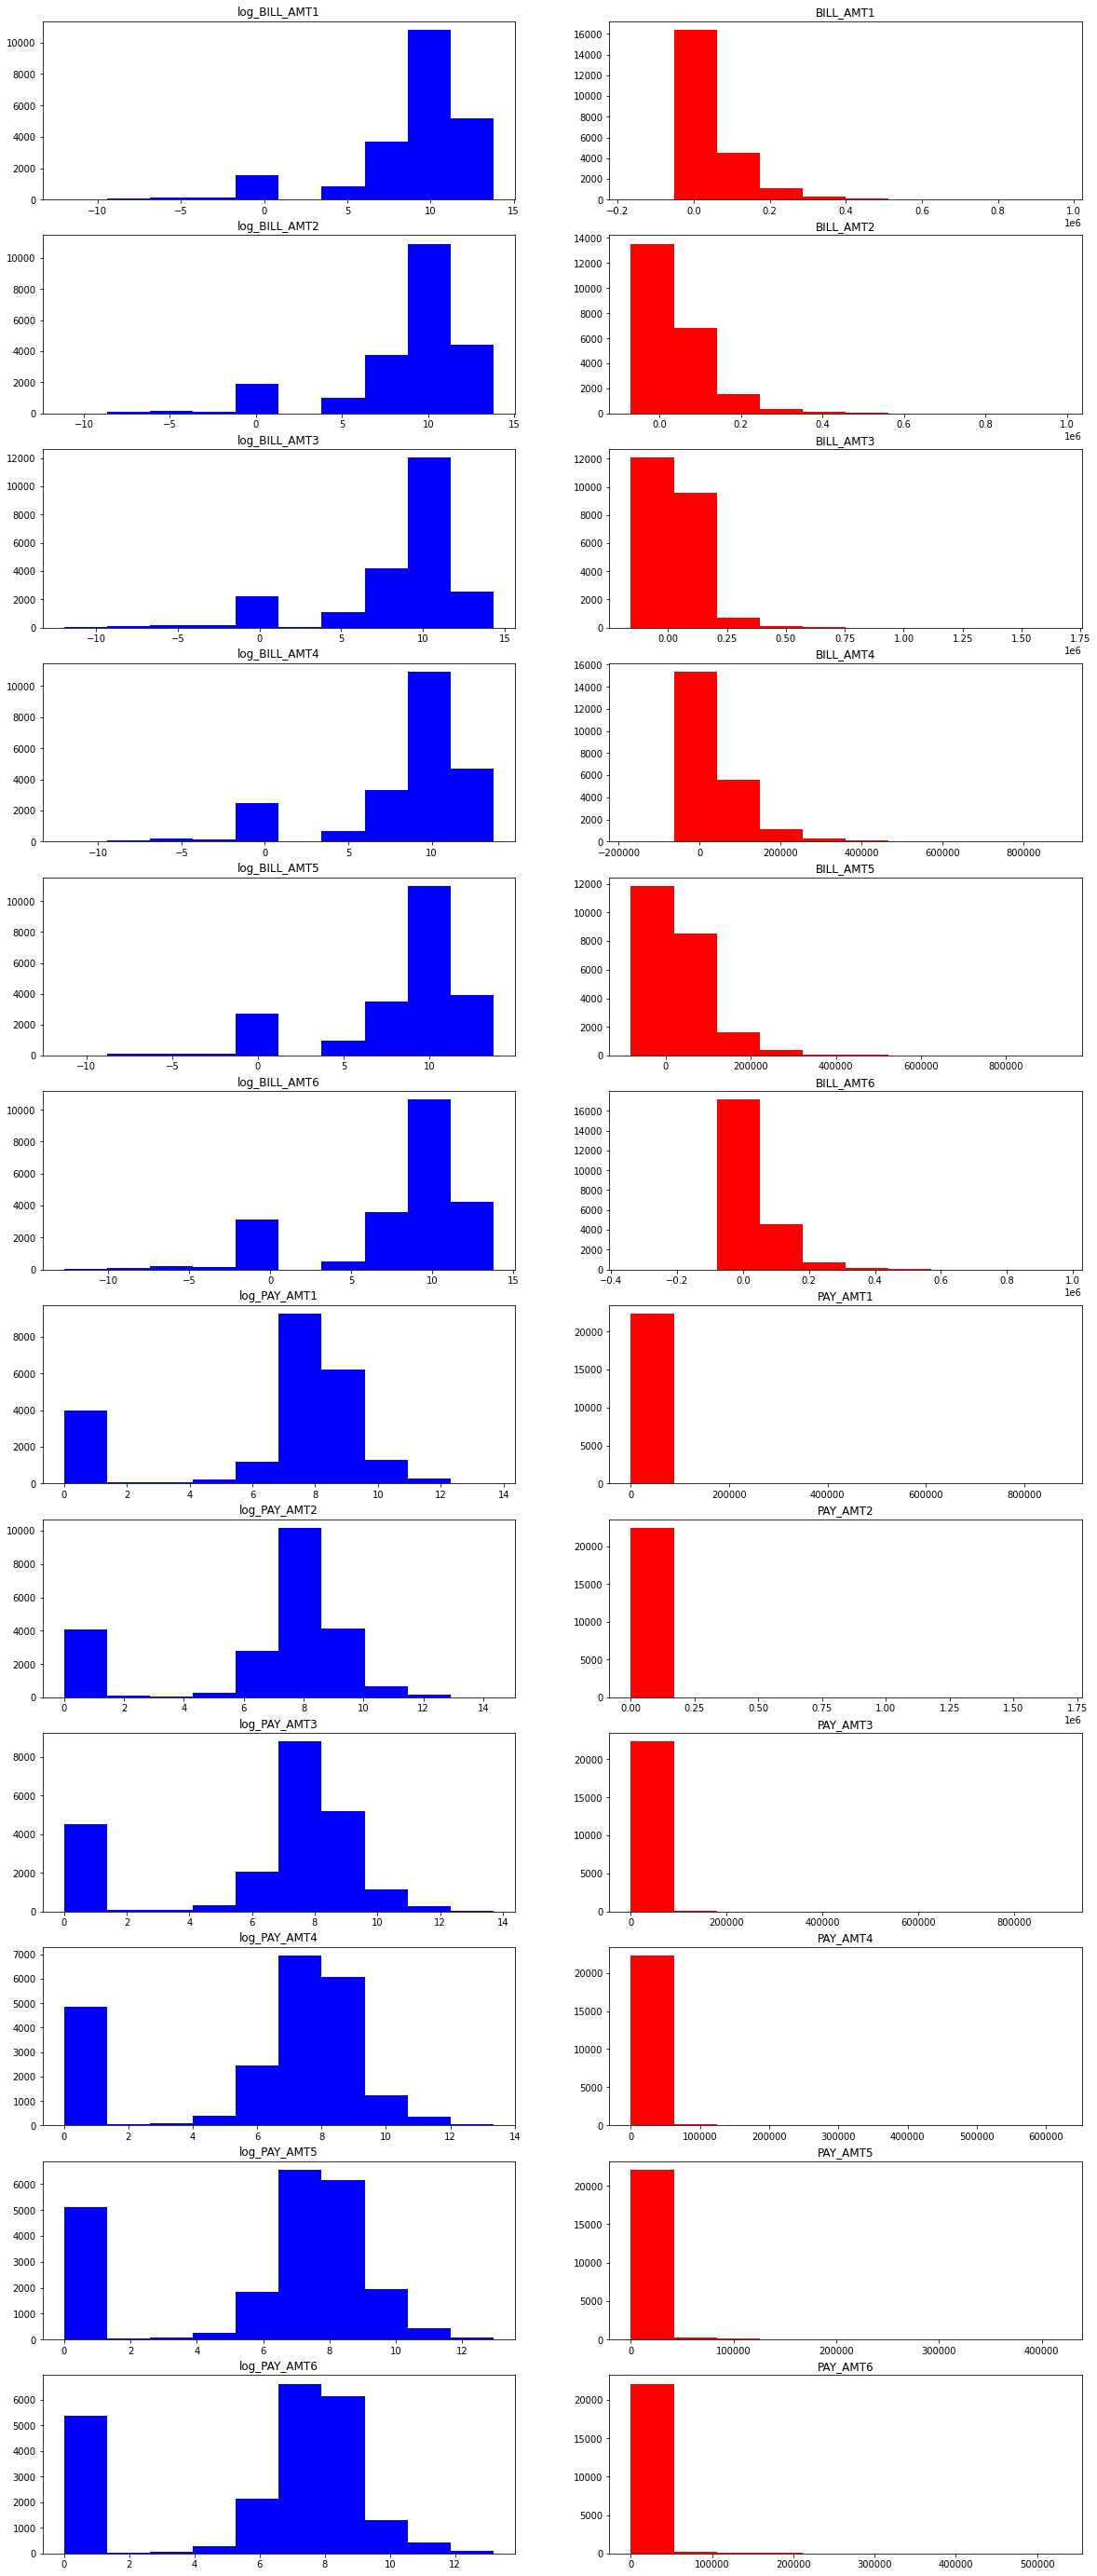

In [110]:
fig, axes = plt.subplots(12,2, num=1, clear=True, figsize=(20,50))

for i in range(12):
    axes[i,0].hist(df_log.iloc[:,i],color='b')
    axes[i,0].set_title(df_log.columns[i])

for i in range(12):
    axes[i,1].hist(df.iloc[:,12:-1].iloc[:,i],color='r')
    axes[i,1].set_title(df.iloc[:,12:-1].columns[i])
plt.show()

In [111]:
df_log.describe()

,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
count,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000,22500.000000
mean,8.963948,8.756074,8.631158,8.473952,8.314486,8.081983,6.634320,6.564066,6.291826,6.078322,6.017167,5.941555
std,3.541697,3.789721,3.879237,3.968312,4.024370,4.213010,3.250165,3.282292,3.357053,3.400847,3.455247,3.525089
min,-12.017210,-11.153060,-11.965681,-12.043554,-11.306319,-12.735533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.190632,8.039157,7.928046,7.782807,7.511935,7.135488,6.907755,6.745236,5.981414,5.703782,5.483757,4.932669
50%,10.033528,9.985597,9.916428,9.861337,9.811564,9.754320,7.650169,7.606387,7.509335,7.313220,7.313220,7.313220
75%,11.113757,11.061178,11.001721,10.907991,10.821617,10.804375,8.517793,8.517193,8.419250,8.295611,8.294799,8.294050
max,13.779377,13.799311,14.324788,13.700757,13.739893,13.776420,13.680323,14.336836,13.705740,13.339086,12.943213,13.178112


In [112]:
df.iloc[:,12:-1].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000,2.250000e+04,22500.000000,22500.000000,22500.000000,22500.000000
mean,51245.067778,49206.147733,4.701756e+04,43418.400756,40429.360489,38946.791822,5650.333644,5.961813e+03,5315.743644,4881.652578,4794.299200,5260.496311
std,73507.326943,71120.080694,6.945343e+04,64511.798629,60983.707777,59701.813056,16688.006347,2.448806e+04,18169.839098,16304.685745,15238.981992,18312.417605
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3607.000000,3100.000000,2.774000e+03,2399.000000,1829.750000,1255.750000,1000.000000,8.500000e+02,396.000000,300.000000,240.750000,138.750000
50%,22777.500000,21711.500000,2.026050e+04,19174.500000,18243.500000,17228.500000,2101.000000,2.011000e+03,1825.000000,1500.000000,1500.000000,1500.000000
75%,67087.750000,63651.500000,5.997725e+04,54611.000000,50092.000000,49235.750000,5003.000000,5.000000e+03,4533.500000,4006.250000,4003.000000,4000.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,528666.000000


In [113]:
df_log

,log_BILL_AMT1,log_BILL_AMT2,log_BILL_AMT3,log_BILL_AMT4,log_BILL_AMT5,log_BILL_AMT6,log_PAY_AMT1,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6
20349,11.277203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6983,5.739793,6.721426,5.416100,0.000000,0.000000,0.000000,6.723832,5.416100,0.000000,0.000000,0.000000,0.000000
17548,10.835770,10.839189,10.856573,10.855300,9.737492,9.758173,7.600902,7.649693,7.244228,6.396930,6.907755,6.907755
954,7.787382,7.673688,7.678326,7.449498,11.586092,11.589331,7.673688,7.678326,7.449498,11.586092,8.517193,8.160518
12866,9.913190,9.885222,9.752548,9.564723,9.824174,9.538060,7.226936,7.021976,6.131226,8.699515,6.436150,7.600902
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,7.885705,8.258163,9.278840,9.068431,8.370548,7.885705,8.258163,9.278840,6.907755,4.605170,6.907755,7.957177
19277,7.910957,7.425954,6.338594,11.029456,10.973031,10.973031,7.425954,6.338594,11.029456,0.000000,0.000000,8.407378
23975,10.192194,9.239705,9.186867,9.082280,9.148890,8.834046,7.090077,7.600902,7.600902,6.907755,6.907755,6.907755
12381,0.000000,6.461468,10.366026,10.667443,7.809541,7.836765,6.461468,10.366089,10.858730,10.915088,7.836765,8.651199


In [114]:
df.iloc[:,12:-1]

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20349,79000,0,0,0,0,0,0,0,0,0,0,0
6983,311,830,225,0,0,0,832,225,0,0,0,0
17548,50806,50980,51874,51808,16941,17295,2000,2100,1400,600,1000,1000
954,2410,2151,2161,1719,107591,107940,2151,2161,1719,107591,5000,3500
12866,20195,19638,17198,14253,18475,13878,1376,1121,460,6000,624,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
22066,2659,3859,10709,8677,4318,2659,3859,10709,1000,100,1000,2856
19277,2727,1679,566,61664,58281,58281,1679,566,61664,0,0,4480
23975,26694,10298,9768,8798,9404,6864,1200,2000,2000,1000,1000,1000
12381,0,640,31762,42935,2464,2532,640,31764,51986,55000,2532,5717


## divided Defaults and non_Defaults

In [115]:
df =pd.concat([df_original,df_log,df_usage],axis=1)

In [116]:
defaults =df.loc[df.iloc[:,-1]==1]

In [117]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
0,1,20000,2,2,1,24,2,2,-1,-1,...,6.535241,0.000000,0.000000,0.000000,0.000000,1.0,20000.0,2.0,2.0,1.0
3,4,50000,2,2,1,37,0,0,0,0,...,7.610358,7.090077,7.003065,6.974479,6.907755,4.0,50000.0,2.0,2.0,1.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10.510014,9.210340,9.104980,6.535241,6.520621,5.0,50000.0,1.0,2.0,1.0
8,9,140000,2,3,1,28,0,0,2,0,...,0.000000,6.068426,6.907755,6.907755,6.907755,9.0,140000.0,2.0,3.0,1.0
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,5.755742,0.000000,6.448889,5.755742,0.000000,22.0,120000.0,2.0,2.0,1.0


In [118]:
non_defaults = df.loc[df.iloc[:,-1]==0]

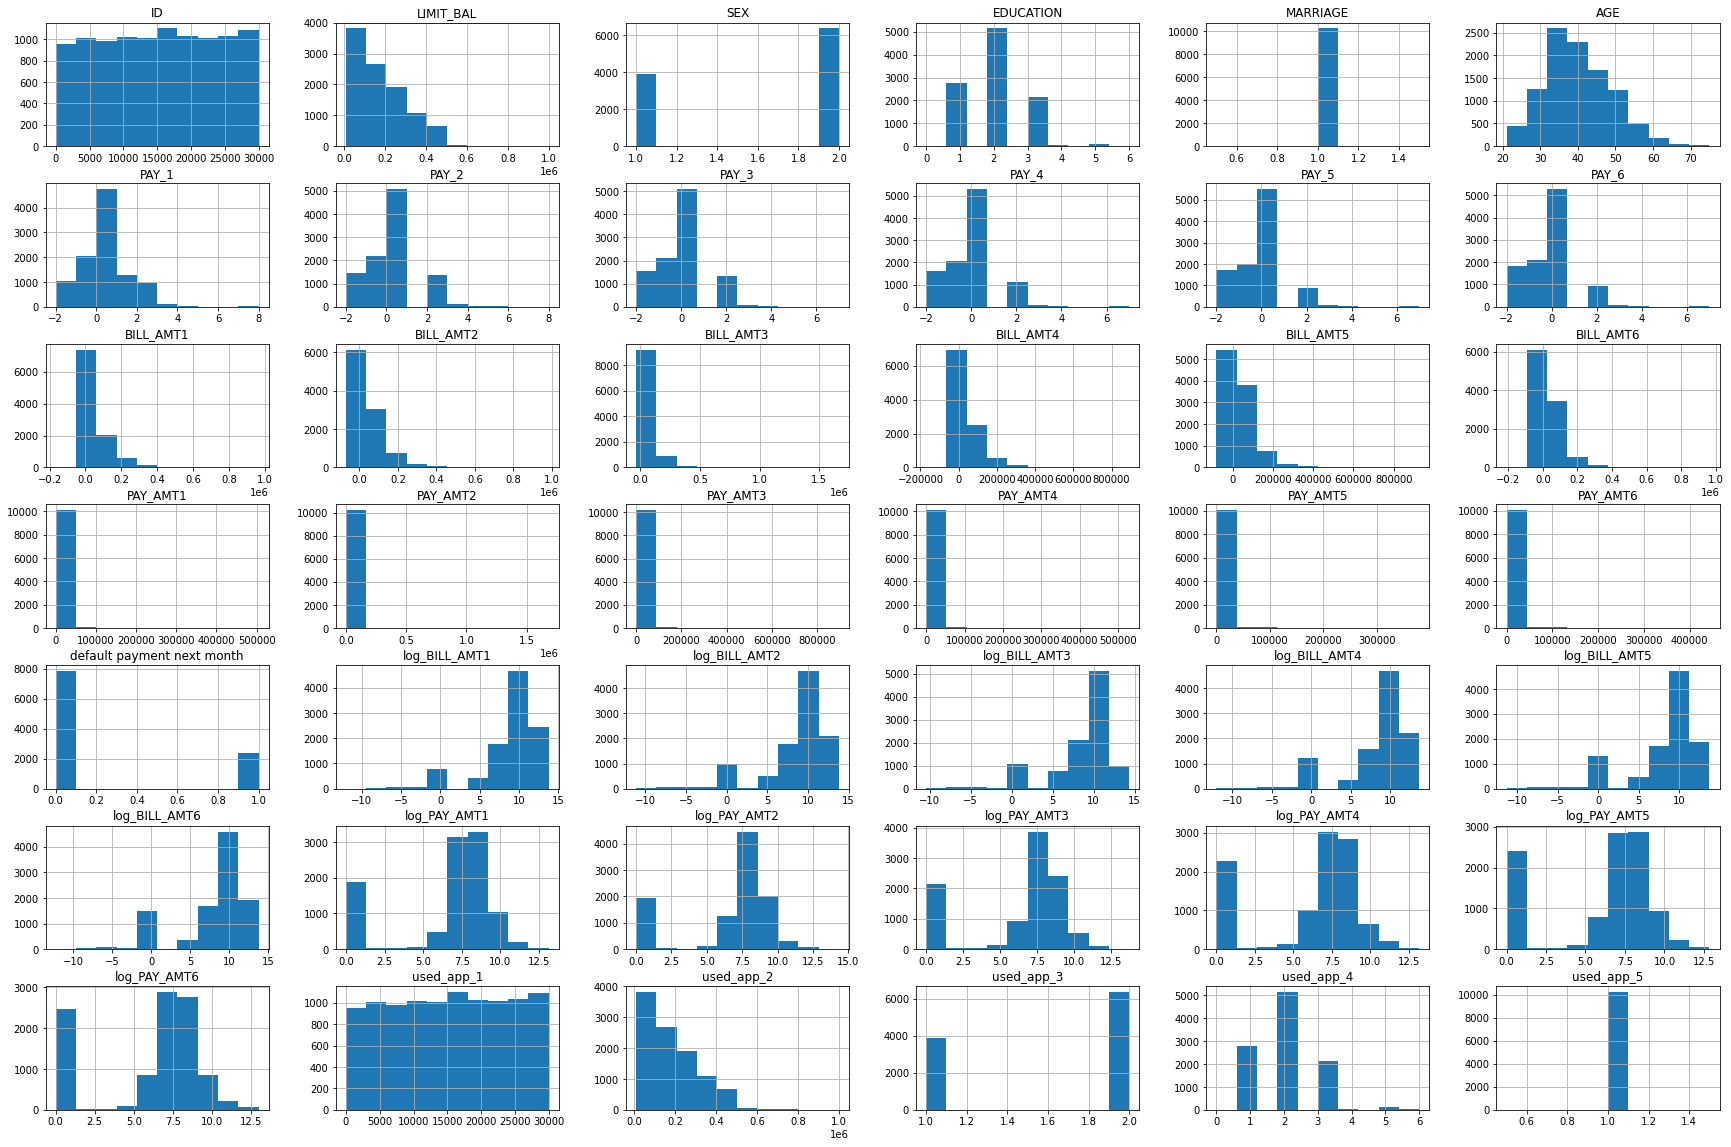

In [119]:
defaults.hist(figsize=(30,20))
plt.show()

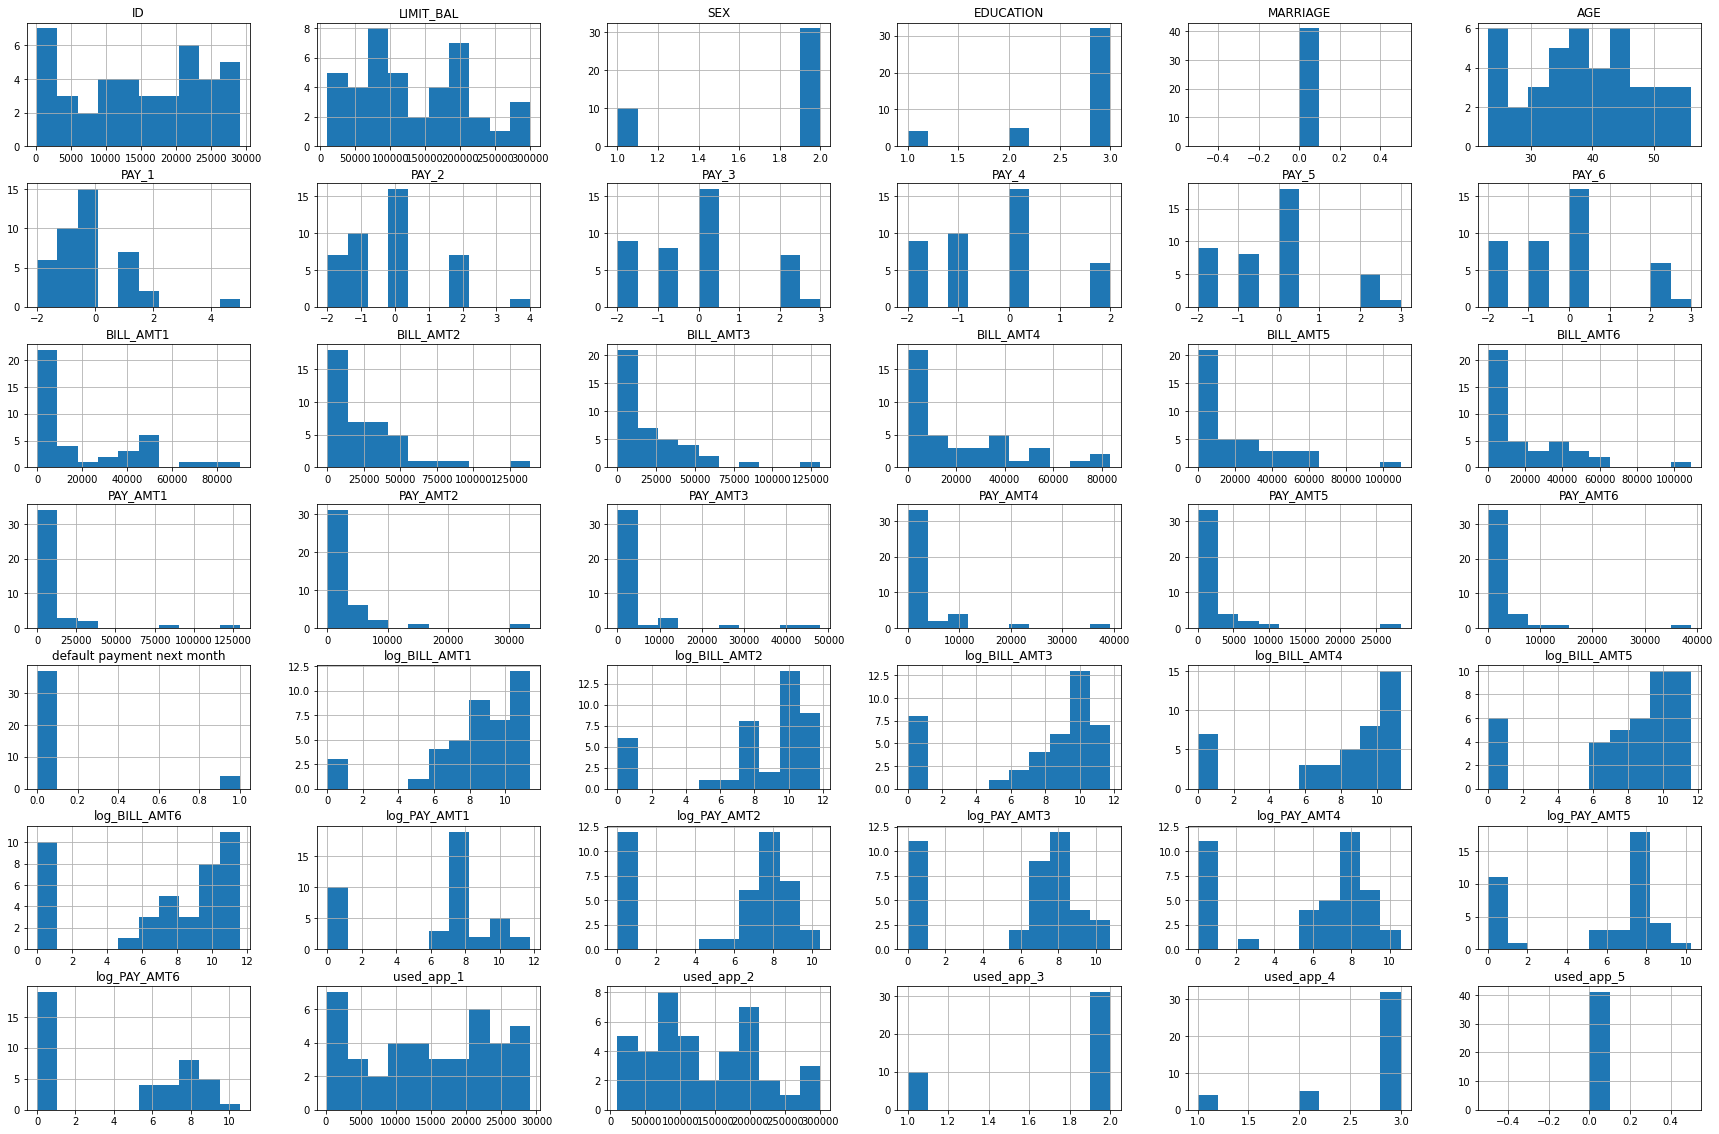

In [120]:
non_defaults.hist(figsize=(30,20))
plt.show()

In [121]:
non_defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
218,219,110000,2,3,0,31,0,0,0,0,...,8.517193,8.006368,8.006368,8.006368,9.099856,219.0,110000.0,2.0,3.0,0.0
809,810,160000,2,2,0,37,0,0,0,0,...,7.189168,6.792344,6.907755,7.001246,6.054439,810.0,160000.0,2.0,2.0,0.0
820,821,200000,2,3,0,51,-1,-1,-1,-1,...,5.966147,6.659294,0.000000,5.966147,5.966147,821.0,200000.0,2.0,3.0,0.0
1019,1020,180000,2,3,0,45,-1,-1,-2,-2,...,0.000000,0.000000,0.000000,0.000000,0.000000,1020.0,180000.0,2.0,3.0,0.0
2146,2147,150000,2,3,0,55,-1,-1,-1,-1,...,9.122601,7.985825,8.130354,7.533694,8.824678,2147.0,150000.0,2.0,3.0,0.0


In [122]:
non_defaults.iloc[0]

ID                               219.000000
LIMIT_BAL                     110000.000000
SEX                                2.000000
EDUCATION                          3.000000
MARRIAGE                           0.000000
AGE                               31.000000
PAY_1                              0.000000
PAY_2                              0.000000
PAY_3                              0.000000
PAY_4                              0.000000
PAY_5                              0.000000
PAY_6                              0.000000
BILL_AMT1                      89989.000000
BILL_AMT2                      84229.000000
BILL_AMT3                      79288.000000
BILL_AMT4                      73315.000000
BILL_AMT5                      63818.000000
BILL_AMT6                      63208.000000
PAY_AMT1                        4000.000000
PAY_AMT2                        5000.000000
PAY_AMT3                        3000.000000
PAY_AMT4                        3000.000000
PAY_AMT5                        

In [123]:
non_defaults.iloc[3]

ID                              1020.000000
LIMIT_BAL                     180000.000000
SEX                                2.000000
EDUCATION                          3.000000
MARRIAGE                           0.000000
AGE                               45.000000
PAY_1                             -1.000000
PAY_2                             -1.000000
PAY_3                             -2.000000
PAY_4                             -2.000000
PAY_5                             -2.000000
PAY_6                             -2.000000
BILL_AMT1                       4148.000000
BILL_AMT2                          0.000000
BILL_AMT3                          0.000000
BILL_AMT4                          0.000000
BILL_AMT5                          0.000000
BILL_AMT6                          0.000000
PAY_AMT1                           0.000000
PAY_AMT2                           0.000000
PAY_AMT3                           0.000000
PAY_AMT4                           0.000000
PAY_AMT5                        

In [124]:
defaults.iloc[0]

ID                                1.000000
LIMIT_BAL                     20000.000000
SEX                               2.000000
EDUCATION                         2.000000
MARRIAGE                          1.000000
AGE                              24.000000
PAY_1                             2.000000
PAY_2                             2.000000
PAY_3                            -1.000000
PAY_4                            -1.000000
PAY_5                            -2.000000
PAY_6                            -2.000000
BILL_AMT1                      3913.000000
BILL_AMT2                      3102.000000
BILL_AMT3                       689.000000
BILL_AMT4                         0.000000
BILL_AMT5                         0.000000
BILL_AMT6                         0.000000
PAY_AMT1                          0.000000
PAY_AMT2                        689.000000
PAY_AMT3                          0.000000
PAY_AMT4                          0.000000
PAY_AMT5                          0.000000
PAY_AMT6   

In [125]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
0,1,20000,2,2,1,24,2,2,-1,-1,...,6.535241,0.000000,0.000000,0.000000,0.000000,1.0,20000.0,2.0,2.0,1.0
1,2,120000,2,2,2,26,-1,2,0,0,...,6.907755,6.907755,6.907755,0.000000,7.600902,2.0,120000.0,2.0,2.0,2.0
2,3,90000,2,2,2,34,0,0,0,0,...,7.313220,6.907755,6.907755,6.907755,8.517193,3.0,90000.0,2.0,2.0,2.0
3,4,50000,2,2,1,37,0,0,0,0,...,7.610358,7.090077,7.003065,6.974479,6.907755,4.0,50000.0,2.0,2.0,1.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10.510014,9.210340,9.104980,6.535241,6.520621,5.0,50000.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8.167919,9.104758,4.859812,0.000000,0.000000,29997.0,150000.0,1.0,3.0,2.0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,0.000000,9.998798,8.342840,7.600902,8.039157,29998.0,30000.0,1.0,2.0,2.0
29998,29999,80000,1,3,1,41,1,-1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
import random 

In [127]:
defaults.iloc[random.randint(0,100)]

ID                               111.000000
LIMIT_BAL                     330000.000000
SEX                                2.000000
EDUCATION                          1.000000
MARRIAGE                           1.000000
AGE                               31.000000
PAY_1                              0.000000
PAY_2                              0.000000
PAY_3                              2.000000
PAY_4                              0.000000
PAY_5                              0.000000
PAY_6                              0.000000
BILL_AMT1                     105879.000000
BILL_AMT2                     108431.000000
BILL_AMT3                     105594.000000
BILL_AMT4                     105896.000000
BILL_AMT5                     106491.000000
BILL_AMT6                     107289.000000
PAY_AMT1                        9260.000000
PAY_AMT2                           0.000000
PAY_AMT3                        3593.000000
PAY_AMT4                        4100.000000
PAY_AMT5                       1

In [128]:
defaults.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
0,1,20000,2,2,1,24,2,2,-1,-1,...,6.535241,0.000000,0.000000,0.000000,0.000000,1.0,20000.0,2.0,2.0,1.0
3,4,50000,2,2,1,37,0,0,0,0,...,7.610358,7.090077,7.003065,6.974479,6.907755,4.0,50000.0,2.0,2.0,1.0
4,5,50000,1,2,1,57,-1,0,-1,0,...,10.510014,9.210340,9.104980,6.535241,6.520621,5.0,50000.0,1.0,2.0,1.0
8,9,140000,2,3,1,28,0,0,2,0,...,0.000000,6.068426,6.907755,6.907755,6.907755,9.0,140000.0,2.0,3.0,1.0
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,5.755742,0.000000,6.448889,5.755742,0.000000,22.0,120000.0,2.0,2.0,1.0


In [129]:
non_defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
count,41.000000,41.000000,41.000000,41.000000,41.0,41.000000,41.000000,41.000000,41.000000,41.000000,...,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.0
mean,14932.780488,133170.731707,1.756098,2.682927,0.0,38.682927,-0.146341,-0.146341,-0.219512,-0.390244,...,5.522857,5.865379,5.610013,5.436781,4.129293,14932.780488,133170.731707,1.756098,2.682927,0.0
std,9376.534548,82080.418627,0.434769,0.649578,0.0,9.136299,1.352054,1.424096,1.405564,1.262498,...,3.705419,3.733294,3.657330,3.552508,3.980299,9376.534548,82080.418627,0.434769,0.649578,0.0
min,219.000000,10000.000000,1.000000,1.000000,0.0,23.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,219.000000,10000.000000,1.000000,1.000000,0.0
25%,6390.000000,70000.000000,2.000000,3.000000,0.0,31.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6390.000000,70000.000000,2.000000,3.000000,0.0
50%,16582.000000,120000.000000,2.000000,3.000000,0.0,37.000000,0.000000,0.000000,0.000000,0.000000,...,7.313220,7.419980,7.377759,7.495542,5.991465,16582.000000,120000.000000,2.000000,3.000000,0.0
75%,23104.000000,200000.000000,2.000000,3.000000,0.0,45.000000,0.000000,0.000000,0.000000,0.000000,...,8.056427,8.010028,8.006368,7.824046,7.600902,23104.000000,200000.000000,2.000000,3.000000,0.0
max,29112.000000,300000.000000,2.000000,3.000000,0.0,56.000000,5.000000,4.000000,3.000000,2.000000,...,10.419748,10.780518,10.580861,10.257659,10.567515,29112.000000,300000.000000,2.000000,3.000000,0.0


In [130]:
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,log_PAY_AMT2,log_PAY_AMT3,log_PAY_AMT4,log_PAY_AMT5,log_PAY_AMT6,used_app_1,used_app_2,used_app_3,used_app_4,used_app_5
count,10238.000000,10238.000000,10238.000000,10238.000000,10238.0,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,...,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.000000,10238.0
mean,15264.978121,182067.982028,1.621117,1.987107,1.0,39.990232,-0.036238,-0.166732,-0.204727,-0.260598,...,6.531077,6.254525,6.072275,5.983800,5.953699,15264.978121,182067.982028,1.621117,1.987107,1.0
std,8648.671426,133341.501091,0.485133,0.792924,0.0,8.659081,1.154795,1.230271,1.219685,1.189922,...,3.342184,3.409472,3.441750,3.493170,3.539119,8648.671426,133341.501091,0.485133,0.792924,0.0
min,1.000000,10000.000000,1.000000,0.000000,1.0,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10000.000000,1.000000,0.000000,1.0
25%,7778.250000,70000.000000,1.000000,1.000000,1.0,34.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,6.567024,5.966147,5.673323,5.233768,4.930851,7778.250000,70000.000000,1.000000,1.000000,1.0
50%,15383.500000,160000.000000,2.000000,2.000000,1.0,39.000000,0.000000,0.000000,0.000000,0.000000,...,7.632159,7.558777,7.334982,7.313220,7.313220,15383.500000,160000.000000,2.000000,2.000000,1.0
75%,22905.000000,260000.000000,2.000000,2.000000,1.0,45.000000,0.000000,0.000000,0.000000,0.000000,...,8.520587,8.471097,8.354557,8.342840,8.336689,22905.000000,260000.000000,2.000000,2.000000,1.0
max,30000.000000,1000000.000000,2.000000,6.000000,1.0,75.000000,8.000000,8.000000,7.000000,7.000000,...,14.336836,13.705740,13.178549,12.845996,13.001327,30000.000000,1000000.000000,2.000000,6.000000,1.0


## Histogram with Comparison red=defaults

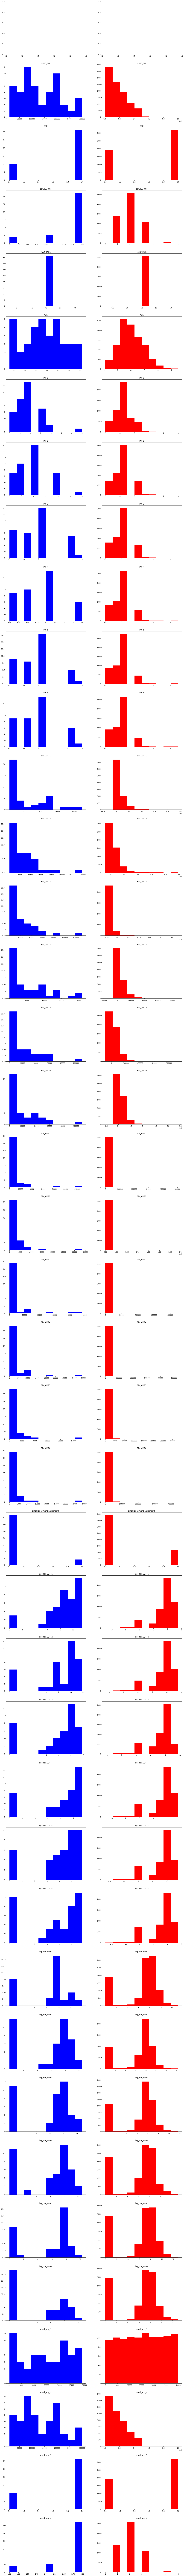

In [131]:
fig, axes = plt.subplots(24+12+5,2, num=1, clear=True, figsize=(20,300))

for i in range(1,24+12+5):
    axes[i,0].hist(non_defaults.iloc[:,i],color='b')
    axes[i,0].set_title(df.columns[i])

for i in range(1,24+12+5):
    axes[i,1].hist(defaults.iloc[:,i],color='r')
    axes[i,1].set_title(df.columns[i])
plt.show()